# Random Forest

# Read the CSV and Perform Basic Data Cleaning

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
claims_param = pd.read_csv("./Resources/claims_accidents.csv")
# TEAM_CRASH copy/ML_starter_code_templates/claims_selected_features.csv

# Drop the null columns where all values are null
claims_param1 = claims_param.dropna(axis='columns', how='all')
# Drop the null rows
claims_param1.head()

,age,bodily_injuries,auto_year,incident_hour_of_the_day,number_of_vehicles_involved,total_claim_amount,visibility,temperature,humidity,wind_speed
0,48,1,2004,5,1,71610,10.0,63.0,45.0,0.0
1,42,0,2007,8,1,5070,10.0,37.0,89.0,0.0
2,29,2,2007,7,3,34650,10.0,37.0,54.0,7.0
3,41,1,2014,5,1,63400,2.0,70.0,93.0,12.0
4,44,0,2009,20,1,6500,10.0,87.0,63.0,13.0


In [3]:
claims_param1.columns

Index(['age', 'bodily_injuries', 'auto_year', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'total_claim_amount', 'visibility',
       'temperature', 'humidity', 'wind_speed'],
      dtype='object')

In [4]:
# Set features for training & testing. This will also be used as your x values.
claims_trining_features = claims_param1[['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'visibility','temperature', 'humidity', 'wind_speed', 'auto_year']].dropna()
# DataFrame with new columns
print(claims_trining_features.columns)

Index(['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'visibility', 'temperature', 'humidity', 'wind_speed', 'auto_year'],
      dtype='object')


# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
X = claims_trining_features
y = claims_trining_features['auto_year']
print(X.shape, y.shape)

(200, 8) (200,)


In [6]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train the Model

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
training_score = rf.score(X_train, y_train)
testing_score = rf.score(X_test, y_test)
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 1.0
Testing Data Score: 0.56


In [8]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
sorted(zip(rf.feature_importances_, claims_trining_features), reverse=True)

[(0.3595941675710279, 'auto_year'),
 (0.14600509410808715, 'vehicle_claim'),
 (0.14566565357193725, 'injury_claim'),
 (0.13115502898210488, 'age'),
 (0.12175004392411191, 'incident_hour_of_the_day'),
 (0.056227348336271604, 'bodily_injuries'),
 (0.03960266350645925, 'number_of_vehicles_involved')]

In [10]:
# Make predictions with the model
predictions = rf.predict(X_test)

In [11]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,2001,2001
1,1997,1999
2,2005,2005
3,2006,2013
4,2007,2006
5,1997,1997
6,2002,2004
7,2005,2006
8,2002,2002
9,2002,2002


In [12]:
results.head(10)

,Prediction,Actual
0,2001,2001
1,1997,1999
2,2005,2005
3,2006,2013
4,2007,2006
5,1997,1997
6,2002,2004
7,2005,2006
8,2002,2002
9,2002,2002


In [13]:
results.tail(10)

,Prediction,Actual
40,2011,2013
41,2007,2006
42,2009,2007
43,2004,2005
44,1999,1999
45,2006,2006
46,2011,2011
47,2014,2014
48,2012,2012
49,2006,2007


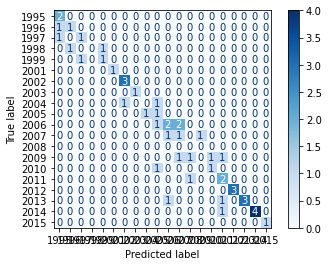

In [14]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test, cmap="Blues")
plt.show()

In [15]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions,
#                             target_names=["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

In [26]:
# Saving model by updating "your_name" with Adebayo
# and "your_model" with model variable
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Adebayo_RF6.sav'
joblib.dump(rf, filename)

['Adebayo_RF6.sav']

In [17]:
!pip install sqlalchemy
import sqlite3
import pandas as pd
from sqlalchemy import create_engine

     |████████████████████████████████| 1.5 MB 1.7 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 


In [18]:
csv_file = "./Resources/insurance_claims.csv"
claims_df = pd.read_csv(csv_file)
claims_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [25]:
json_file = ("./Resources/claims_accidents.json")
# ML_starter_code_templates/Resources/insurance_claims.json

# claims_df = pd.read_json(json_file)
# claims_df.head()

In [23]:
# rds_connection_string = "CommAde1@hotmail.com:Kola@#$1463@localhost:5432/claims_db"
# engine = create_engine(f'postgresql://{rds_connection_string}')

In [ ]:
# engine.table_names()

In [ ]:
# new_claims_df.to_sql(name='claims', con=engine, if_exists='append', index=False)

In [ ]:
# pd.read_sql_query('select * from claims', con=engine).head()